In [1]:
# imports
import h2o 
import numpy as np
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
from h2o.grid.grid_search import H2OGridSearch

In [2]:
# display matplotlib graphics in notebook
%matplotlib inline

In [3]:
# start and connect to h2o server
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_112"; Java(TM) SE Runtime Environment (build 1.8.0_112-b16); Java HotSpot(TM) 64-Bit Server VM (build 25.112-b16, mixed mode)
  Starting server from /Users/phall/anaconda/lib/python3.5/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmpu7y9qi1u
  JVM stdout: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmpu7y9qi1u/h2o_phall_started_from_python.out
  JVM stderr: /var/folders/tc/0ss1l73113j3wdyjsxmy1j2r0000gn/T/tmpu7y9qi1u/h2o_phall_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


--------------------------  ------------------------------
H2O cluster uptime:         02 secs
H2O cluster version:        3.10.3.4
H2O cluster version age:    1 month and 2 days
H2O cluster name:           H2O_from_python_phall_sxxj60
H2O cluster total nodes:    1
H2O cluster free memory:    3.556 Gb
H2O cluster total cores:    8
H2O cluster allowed cores:  8
H2O cluster status:         accepting new members, healthy
H2O connection url:         http://127.0.0.1:54321
H2O connection proxy:
Python version:             3.5.2 final
--------------------------  ------------------------------

In [4]:
# load clean data
path = '/Users/phall/workspace/GWU_data_mining/03_regression/data/loan_clean.csv'

In [5]:
# define input variable measurement levels 
# strings automatically parsed as enums (nominal)
# numbers automatically parsed as numeric
col_types = {'bad_loan': 'enum'}

In [6]:
frame = h2o.import_file(path=path, col_types=col_types) # multi-threaded import

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [7]:
frame.describe()

Rows:163987
Cols:18




id bad_loan GRP_REP_home_ownership GRP_addr_state GRP_home_ownership GRP_purpose GRP_verification_status _WARN_ STD_IMP_REP_annual_inc STD_IMP_REP_delinq_2yrs STD_IMP_REP_dti STD_IMP_REP_emp_length STD_IMP_REP_int_rate STD_IMP_REP_loan_amnt STD_IMP_REP_longest_credit_lengt STD_IMP_REP_revol_util STD_IMP_REP_term_length STD_IMP_REP_total_acc 
 
 
 type int enum int int int int int int real real real real real real real real real real 
 mins 10001.0 1.0 1.0 1.0 1.0 1.0 NaN -1.767455639 -0.39219617 -2.119639396 -1.6213902740000001 -1.907046215 -1.587129405 -2.22445124 -2.164541326 -0.516495577 -2.058861889 
 mean 91994.0 2.5740028172964924 11.409337325519703 2.5740028172964924 3.2449401476946345 2.340356247751345 0.0 2.38744452882879e-11 2.2959296297769782e-12 6.807013811211564e-11 -3.566867876239133e-11 -8.948753565861857e-12 8.311927579716105e-11 5.0612534090153816e-11 -1.4734128080190765e-11 -1.5009542966560638e-10 8.060924856225354e-13 
 maxs 173987.0 5.0 37.0 5.0 14.0 3.0 NaN 4.6180619798 4.1566950661 3.0371487270000004 1.2288169612 2.8376799992 2.7671323946 3.1431598296 3.0363495275 1.9718787627 3.0684672884 
 sigma 47339.11363414683 0.6675260435449262 9.971926133461404 0.6675260435449262 2.2672892075259754 0.5040864341768772 -0.0 0.9999999999982868 0.9999999999212518 1.0000000000037712 1.0000000000339833 1.0000000000199503 0.999999999985285 0.9999999999850594 1.000000000017688 1.0000000000642086 1.0000000000331841 
 zeros 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 
 missing 0 0 0 0 0 0 0 163987 0 0 0 0 0 0 0 0 0 0 
 0 10001.0 0 3.0 14.0 3.0 3.0 2.0 nan -1.1992995020000001 -0.39219617 1.5712460425 1.2288169612 -0.7047730510000001 -1.019182214 1.6839024850000002 1.1858716502 -0.516495577 -1.359278248 
 1 10002.0 1 3.0 10.0 3.0 8.0 2.0 nan -1.04507688 -0.39219617 -1.9861534850000002 -1.6213902740000001 0.3572732234 -1.3347084310000001 -0.42059567400000003 -1.7882703350000002 1.9718787627 -1.7965180230000002 
 2 10003.0 0 3.0 7.0 3.0 7.0 3.0 nan -1.501267394 -0.39219617 -0.9556422520000001 1.2288169612 0.5158905241 -1.34732948 -0.7212382690000001 1.7782983174 -0.516495577 -1.271830292 
 3 10004.0 0 3.0 2.0 3.0 4.0 2.0 nan -0.303921333 -0.39219617 0.5500788236 1.2288169612 -0.051913437 -0.388129779 0.0303682169 0.0325652593 -0.516495577 1.089264497 
 4 10005.0 0 3.0 14.0 3.0 10.0 2.0 nan -0.890854259 -0.39219617 -0.624597193 -0.7663281030000001 -1.3369434530000002 -1.019182214 -0.8220262690000001 -1.0317254690000002 -0.516495577 -1.0969343820000002 
 5 10006.0 0 3.0 2.0 3.0 8.0 2.0 nan -0.5824090160000001 -0.39219617 -1.4054897720000001 0.9437962377 1.1319693155000001 -1.271603188 -1.623166051 1.3379811999 -0.516495577 -1.7965180230000002 
 6 10007.0 1 4.0 2.0 4.0 7.0 2.0 nan -0.788039178 -0.39219617 -1.37879259 -0.48130738 1.7388529011 -0.9434559220000001 -1.17220216 -0.8596015050000001 1.9718787627 -1.0094864270000001 
 7 10008.0 1 3.0 4.0 3.0 4.0 2.0 nan -1.430633434 -0.39219617 0.2937858745 -1.6213902740000001 -0.235817553 -0.971853281 -1.17220216 -0.703489072 1.9718787627 -1.883965979 
 8 10009.0 0 4.0 14.0 4.0 2.0 3.0 nan 0.0344814697 -0.39219617 0.032153489 -0.196286656 0.2147475328 -0.8298664840000001 -0.270274377 -1.339947451 1.9718787627 -0.135006875 
 9 10010.0 0 4.0 2.0 4.0 2.0 2.0 nan 0.1115927805 -0.39219617 -0.680661276 1.2288169612 -0.235817553 -0.13570880500000002 1.0826172966 0.5213930910000001 -0.516495577 0.8269206315000001

In [8]:
# split into 40% training, 30% validation, and 30% test
train, valid, test = frame.split_frame([0.4, 0.3])

In [9]:
# assign target and inputs
y = 'bad_loan'
X = [name for name in frame.columns if name not in ['id', '_WARN_', y]]
print(y)
print(X)

bad_loan
['GRP_REP_home_ownership', 'GRP_addr_state', 'GRP_home_ownership', 'GRP_purpose', 'GRP_verification_status', 'STD_IMP_REP_annual_inc', 'STD_IMP_REP_delinq_2yrs', 'STD_IMP_REP_dti', 'STD_IMP_REP_emp_length', 'STD_IMP_REP_int_rate', 'STD_IMP_REP_loan_amnt', 'STD_IMP_REP_longest_credit_lengt', 'STD_IMP_REP_revol_util', 'STD_IMP_REP_term_length', 'STD_IMP_REP_total_acc']


In [10]:
# set target to factor - for binary classification
train[y] = train[y].asfactor()
valid[y] = valid[y].asfactor()
test[y] = test[y].asfactor()

In [11]:
# neural network

# initialize nn model
nn_model = H2ODeepLearningEstimator(
    epochs=50,                    # read over the data 50 times, but in mini-batches
    hidden=[100],                 # 100 hidden units in 1 hidden layer
    input_dropout_ratio=0.2,      # randomly drop 20% of inputs for each iteration, helps w/ generalization
    hidden_dropout_ratios=[0.05], # randomly set 5% of hidden weights to 0 each iteration, helps w/ generalization
    activation='TanhWithDropout', # bounded activation function that allows for dropout, tanh
    l1=0.001,                     # L1 penalty can help generalization   
    l2=0.01,                      # L2 penalty can increase stability in presence of highly correlated inputs
    adaptive_rate=True,           # adjust magnitude of weight updates automatically (+stability, +accuracy)
    stopping_rounds=5,            # stop after validation error does not decrease for 5 iterations
    score_each_iteration=True,    # score validation error on every iteration
    model_id='nn_model')          # for easy lookup in flow

# train nn model
nn_model.train(
    x=X,
    y=y,
    training_frame=train,
    validation_frame=valid)

# print model information
nn_model

# view detailed results at http://localhost:54321/flow/index.html

deeplearning Model Build progress: |██████████████████████████████████████| 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  nn_model


ModelMetricsBinomial: deeplearning
** Reported on train data. **

MSE: 0.14411464647275385
RMSE: 0.3796243491568393
LogLoss: 0.4545508130295154
Mean Per-Class Error: 0.3641766804848612
AUC: 0.6879894198982001
Gini: 0.3759788397964001
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.20919837042173123: 


0     1     Error    Rate
-----  ----  ----  -------  ---------------
0      5628  2396  0.2986   (2396.0/8024.0)
1      818   1082  0.4305   (818.0/1900.0)
Total  6446  3478  0.3239   (3214.0/9924.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.209198     0.40238   210
max f2                       0.131103     0.574812  311
max f0point5                 0.26998      0.364627  145
max accuracy                 0.467634     0.808948  7
max precision                0.487697     0.714286  2
max recall                   0.0641674    1         396
max specificity              0.496047     0.999875  0
max absolute_mcc             0.223786     0.225718  192
max min_per_class_accuracy   0.190597     0.631481  234
max mean_per_class_accuracy  0.174882     0.635823  254

Gains/Lift Table: Avg response rate: 19.15 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100766                   0.443325           2.61158   2.61158            0.5              0.5                         0.0263158       0.0263158                  161.158   161.158
    2        0.0200524                   0.421645           2.37416   2.49347            0.454545         0.477387                    0.0236842       0.05                       137.416   149.347
    3        0.0300282                   0.405488           2.69072   2.559              0.515152         0.489933                    0.0268421       0.0768421                  169.072   155.9
    4        0.040004                    0.391273           1.89933   2.3945             0.363636         0.458438                    0.0189474       0.0957895                  89.933    139.45
    5        0.0500806                   0.375854           2.19373   2.3541             0.42             0.450704                    0.0221053       0.117895                   119.373   135.41
    6        0.10006                     0.326515           1.84285   2.09873            0.352823         0.401813                    0.0921053       0.21                       84.2848   109.873
    7        0.15004                     0.29288            1.63224   1.94334            0.3125           0.372062                    0.0815789       0.291579                   63.2237   94.3337
    8        0.20002                     0.265445           1.6533    1.87086            0.316532         0.358186                    0.0826316       0.374211                   65.3298   87.0864
    9        0.29998                     0.22512            1.36371   1.70187            0.261089         0.325831                    0.136316        0.510526                   36.3708   70.1869
    10       0.40004                     0.195278           1.04674   1.538              0.200403         0.294458                    0.104737        0.615263                   4.67356   53.8003
    11       0.5                         0.170958           1.03726   1.43789            0.198589         0.275292                    0.103684        0.718947                   3.72602   43.7895
    12       0.59996                     0.148869           0.826649  1.33605            0.158266         0.255794                    0.0826316       0.801579                   -17.3351  33.6055
    13       0.70002                     0.129764           0.767957  1.25485            0.147029         0.240248                    0.0768421       0.878421                   -23.2043  25.4851
    14       0.79998                     0.111152           0.463345  1.15595            0.0887097        0.221313                    0.0463158       0.924737                   -53.6655  15.595
    15       0.89994                     0.0922571          0.452814  1.07785            0.0866935        0.20636                     0.0452632       0.97                       -54.7186  7.78502
    16       1                           0.0596773          0.299819  1                  0.0574018        0.191455                    0.03            1                          -70.0181  0



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14716412316013278
RMSE: 0.38361976377675433
LogLoss: 0.46347712915408495
Mean Per-Class Error: 0.3757937526837185
AUC: 0.6690848124829848
Gini: 0.3381696249659696
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1974456585232734: 


0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      26099  13560  0.3419   (13560.0/39659.0)
1      3905   5627   0.4097   (3905.0/9532.0)
Total  30004  19187  0.355    (17465.0/49191.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.197446     0.391866  230
max f2                       0.111693     0.562724  338
max f0point5                 0.284259     0.355002  137
max accuracy                 0.451823     0.806509  19
max precision                0.472737     0.520833  10
max recall                   0.0603167    1         399
max specificity              0.509198     0.999924  0
max absolute_mcc             0.203        0.201732  223
max min_per_class_accuracy   0.188909     0.621905  240
max mean_per_class_accuracy  0.197446     0.624206  230

Gains/Lift Table: Avg response rate: 19.38 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.0100018                   0.444902           2.60129   2.60129            0.504065         0.504065                    0.0260176       0.0260176                  160.129   160.129
    2        0.0200037                   0.421426           2.16075   2.38102            0.418699         0.461382                    0.0216114       0.047629                   116.075   138.102
    3        0.0300055                   0.402788           2.07683   2.27962            0.402439         0.441734                    0.0207721       0.0684012                  107.683   127.962
    4        0.0400073                   0.388612           2.0139    2.21319            0.390244         0.428862                    0.0201427       0.0885439                  101.39    121.319
    5        0.0500091                   0.375663           1.99292   2.16914            0.386179         0.420325                    0.0199329       0.108477                   99.2921   116.914
    6        0.100018                    0.325871           1.83559   2.00236            0.355691         0.388008                    0.0917961       0.200273                   83.5585   100.236
    7        0.150007                    0.290721           1.78806   1.93095            0.346482         0.37417                     0.0893831       0.289656                   78.8062   93.0948
    8        0.200016                    0.263742           1.40763   1.80011            0.272764         0.348816                    0.0703945       0.36005                    40.7632   80.0105
    9        0.300014                    0.223501           1.25265   1.61763            0.242732         0.313457                    0.125262        0.485313                   25.2648   61.7632
    10       0.400012                    0.194456           1.1341    1.49675            0.21976          0.290034                    0.113407        0.59872                    13.4098   49.6755
    11       0.50001                     0.170073           0.958895  1.38919            0.18581          0.26919                     0.0958875       0.694608                   -4.11051  38.9187
    12       0.600008                    0.148838           0.816215  1.29369            0.158162         0.250686                    0.0816198       0.776227                   -18.3785  29.3695
    13       0.700006                    0.129353           0.743825  1.21514            0.144135         0.235465                    0.074381        0.850608                   -25.6175  21.5144
    14       0.800004                    0.110818           0.641012  1.14338            0.124212         0.221559                    0.0640999       0.914708                   -35.8988  14.338
    15       0.900002                    0.0927616          0.468956  1.06845            0.0908721        0.207038                    0.0468947       0.961603                   -53.1044  6.84454
    16       1                           0.0590042          0.383978  1                  0.0744054        0.193775                    0.038397        1                          -61.6022  0


Scoring History: 


timestamp            duration    training_speed    epochs    iterations    samples      training_rmse    training_logloss    training_auc    training_lift    training_classification_error    validation_rmse    validation_logloss    validation_auc    validation_lift    validation_classification_error
--  -------------------  ----------  ----------------  --------  ------------  -----------  ---------------  ------------------  --------------  ---------------  -------------------------------  -----------------  --------------------  ----------------  -----------------  ---------------------------------
    2017-03-05 14:57:57  0.000 sec                     0         0             0            nan              nan                 nan             nan              nan                              nan                nan                   nan               nan                nan
    2017-03-05 14:57:59  3.062 sec   76298 obs/sec     1.52262   1             99951        0.380278         0.45536             0.685953        2.61158          0.345224                         0.384423           0.464555              0.66884           2.50689            0.375597
    2017-03-05 14:58:01  4.515 sec   81583 obs/sec     3.04491   2             199880       0.379788         0.455195            0.689337        2.45488          0.343208                         0.383716           0.46371               0.670735          2.45444            0.381655
    2017-03-05 14:58:02  5.929 sec   82905 obs/sec     4.5618    3             299455       0.379811         0.454664            0.687295        2.55935          0.366082                         0.384195           0.464625              0.666697          2.64324            0.356386
    2017-03-05 14:58:03  7.582 sec   85776 obs/sec     6.08785   4             399631       0.383333         0.462401            0.688219        2.55935          0.37505                          0.387133           0.471881              0.670112          2.46493            0.387063
    2017-03-05 14:58:06  10.107 sec  71733 obs/sec     7.61218   5             499694       0.379838         0.45451             0.688188        2.50712          0.340488                         0.384082           0.464291              0.669156          2.53835            0.387591
    2017-03-05 14:58:08  11.420 sec  74286 obs/sec     9.13591   6             599718       0.380339         0.456727            0.689894        2.55935          0.369206                         0.384516           0.465618              0.669289          2.51737            0.357586
    2017-03-05 14:58:09  12.670 sec  76750 obs/sec     10.6607   7             699811       0.380061         0.455621            0.684724        2.35042          0.344518                         0.383992           0.464035              0.668192          2.39151            0.392511
    2017-03-05 14:58:10  13.871 sec  78923 obs/sec     12.1841   8             799810       0.380053         0.4559              0.685054        2.82051          0.312072                         0.384118           0.464834              0.665808          2.61178            0.36218
    2017-03-05 14:58:11  15.033 sec  81064 obs/sec     13.7087   9             899892       0.379676         0.454298            0.689032        2.66381          0.375857                         0.38391            0.464307              0.670436          2.66422            0.362485
    2017-03-05 14:58:13  16.193 sec  82809 obs/sec     15.2325   10            999920       0.380899         0.456618            0.686607        2.55935          0.314792                         0.385586           0.467627              0.667343          2.34955            0.404627
    2017-03-05 14:58:14  17.374 sec  84153 obs/sec     16.754    11            1.0998e+06   0.380327         0.45563             0.687535        2.40265          0.349355                         0.384582           0.465036              0.667739          2.39151            0.410116
    2017-03-05

In [12]:
# measure nn AUC
print(nn_model.auc(train=True))
print(nn_model.auc(valid=True))
print(nn_model.model_performance(test_data=test).auc())

0.6879894198982001
0.6690848124829848
0.6768012585175186


In [13]:
# NN with random hyperparameter search
# train many different NN models with random hyperparameters
# and select best model based on validation error

# define random grid search parameters
hyper_parameters = {'hidden':[[170, 320], [80, 190], [320, 160, 80], [100], [50, 50, 50, 50]],
                    'l1':[s/1e4 for s in range(0, 1000, 100)],
                    'l2':[s/1e5 for s in range(0, 1000, 100)],
                    'input_dropout_ratio':[s/1e2 for s in range(0, 20, 2)]}

# define search strategy
search_criteria = {'strategy':'RandomDiscrete',
                   'max_models':20,
                   'max_runtime_secs':600}

# initialize grid search
gsearch = H2OGridSearch(H2ODeepLearningEstimator,
                        hyper_params=hyper_parameters,
                        search_criteria=search_criteria)

# execute training w/ grid search
gsearch.train(x=X,
              y=y,
              training_frame=train,
              validation_frame=valid)

# view detailed results at http://localhost:54321/flow/index.html

deeplearning Grid Build progress: |███████████████████████████████████████| 100%


In [14]:
# show grid search results
gsearch.show()

# select best model
nn_model2 = gsearch.get_grid()[0]

# print model information
nn_model2

                hidden input_dropout_ratio    l1     l2  \
0                [100]                0.18  0.02  0.008   
1                [100]                 0.1  0.02  0.008   
2                [100]                 0.1  0.06  0.006   
3       [320, 160, 80]                 0.0  0.01  0.001   
4           [170, 320]                0.06  0.01  0.007   
5           [170, 320]                0.12  0.03  0.004   
6            [80, 190]                0.18  0.02  0.008   
7            [80, 190]                 0.1  0.03  0.009   
8     [50, 50, 50, 50]                0.08  0.05  0.004   
9            [80, 190]                0.18  0.06  0.005   
10           [80, 190]                 0.0  0.06  0.008   
11               [100]                0.02  0.04  0.006   
12               [100]                0.02  0.06  0.004   
13           [80, 190]                0.18  0.06  0.007   
14          [170, 320]                0.06  0.07  0.007   
15           [80, 190]                0.14  0.03  0.004 

0     1     Error    Rate
-----  ----  ----  -------  ----------------
0      5491  2663  0.3266   (2663.0/8154.0)
1      818   1130  0.4199   (818.0/1948.0)
Total  6309  3793  0.3446   (3481.0/10102.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.196981     0.39366   201
max f2                       0.120492     0.564427  328
max f0point5                 0.244555     0.351651  131
max accuracy                 0.34558      0.808058  33
max precision                0.397797     0.552632  4
max recall                   0.0669954    1         392
max specificity              0.406255     0.998528  0
max absolute_mcc             0.210722     0.212059  178
max min_per_class_accuracy   0.188942     0.623203  214
max mean_per_class_accuracy  0.191495     0.626863  209

Gains/Lift Table: Avg response rate: 19.28 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain      cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  --------  -----------------
    1        0.010097                    0.368654           2.59292   2.59292            0.5              0.5                         0.0261807       0.0261807                  159.292   159.292
    2        0.020095                    0.351099           2.56724   2.58014            0.49505          0.497537                    0.0256674       0.051848                   156.724   158.014
    3        0.0300931                   0.334452           2.46455   2.54174            0.475248         0.490132                    0.0246407       0.0764887                  146.455   154.174
    4        0.0400911                   0.323773           1.9511    2.39445            0.376238         0.461728                    0.0195072       0.0959959                  95.1105   139.445
    5        0.0500891                   0.311671           2.36186   2.38794            0.455446         0.460474                    0.023614        0.11961                    136.186   138.794
    6        0.100079                    0.273089           1.77653   2.08254            0.342574         0.401583                    0.088809        0.208419                   77.6532   108.254
    7        0.150069                    0.250738           1.489     1.88482            0.287129         0.363456                    0.0744353       0.282854                   48.9001   88.4824
    8        0.200059                    0.235459           1.54035   1.79875            0.29703          0.346858                    0.0770021       0.359856                   54.0346   79.8747
    9        0.30004                     0.210687           1.38118   1.6596             0.266337         0.320026                    0.13809         0.497947                   38.1177   65.9603
    10       0.40002                     0.192694           1.0269    1.50147            0.19802          0.289532                    0.102669        0.600616                   2.68974   50.1466
    11       0.5                         0.176449           0.898535  1.3809             0.173267         0.266284                    0.0898357       0.690452                   -10.1465  38.0903
    12       0.59998                     0.161893           0.90367   1.30138            0.174257         0.250949                    0.0903491       0.780801                   -9.63303  30.1378
    13       0.69996                     0.146644           0.688021  1.21377            0.132673         0.234055                    0.0687885       0.849589                   -31.1979  21.3768
    14       0.799941                    0.129472           0.631542  1.141              0.121782         0.220022                    0.0631417       0.912731                   -36.8458  14.0998
    15       0.899921                    0.109231           0.539121  1.07413            0.10396          0.207128                    0.0539014       0.966632                   -46.0879  7.41306
    16       1                           0.0507288          0.333412  1                  0.0642928        0.192833                    0.0333676       1                          -66.6588  0



ModelMetricsBinomial: deeplearning
** Reported on validation data. **

MSE: 0.14836589527056177
RMSE: 0.3851829374083979
LogLoss: 0.4665108466360082
Mean Per-Class Error: 0.37686646501331533
AUC: 0.669025639866052
Gini: 0.338051279732104
Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.18331602718201165: 


0      1      Error    Rate
-----  -----  -----  -------  -----------------
0      23892  15767  0.3976   (15767.0/39659.0)
1      3395   6137   0.3562   (3395.0/9532.0)
Total  27287  21904  0.3895   (19162.0/49191.0)

Maximum Metrics: Maximum metrics at their respective thresholds



metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.183316     0.390444  222
max f2                       0.133233     0.564849  306
max f0point5                 0.226536     0.348642  157
max accuracy                 0.406348     0.806123  0
max precision                0.406348     0.478632  0
max recall                   0.0592609    1         396
max specificity              0.406348     0.998462  0
max absolute_mcc             0.21175      0.19992   178
max min_per_class_accuracy   0.186078     0.618952  218
max mean_per_class_accuracy  0.183316     0.623134  222

Gains/Lift Table: Avg response rate: 19.38 %



group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    cumulative_response_rate    capture_rate    cumulative_capture_rate    gain       cumulative_gain
--  -------  --------------------------  -----------------  --------  -----------------  ---------------  --------------------------  --------------  -------------------------  ---------  -----------------
    1        0.0100018                   0.371803           2.31808   2.31808            0.449187         0.449187                    0.0231851       0.0231851                  131.808    131.808
    2        0.0200037                   0.349053           2.22368   2.27088            0.430894         0.440041                    0.0222409       0.0454259                  122.368    127.088
    3        0.0300055                   0.332888           2.00341   2.18172            0.388211         0.422764                    0.0200378       0.0654637                  100.341    118.172
    4        0.0400073                   0.319045           2.16075   2.17648            0.418699         0.421748                    0.0216114       0.0870751                  116.075    117.648
    5        0.0500091                   0.308421           2.08732   2.15865            0.404472         0.418293                    0.020877        0.107952                   108.732    115.865
    6        0.100018                    0.271076           1.83978   1.99921            0.356504         0.387398                    0.0920059       0.199958                   83.9781    99.9215
    7        0.150007                    0.248938           1.66004   1.88619            0.321675         0.365497                    0.0829836       0.282942                   66.0044    88.6188
    8        0.200016                    0.23303            1.46008   1.77965            0.282927         0.344852                    0.0730172       0.355959                   46.0077    77.965
    9        0.300014                    0.208737           1.29566   1.61833            0.251067         0.313593                    0.129564        0.485522                   29.5662    61.8331
    10       0.400012                    0.190378           1.08689   1.48548            0.210612         0.287849                    0.108687        0.594209                   8.68874    48.5477
    11       0.50001                     0.174816           0.993516  1.38709            0.192519         0.268784                    0.0993496       0.693559                   -0.648421  38.7089
    12       0.600008                    0.160415           0.848737  1.29737            0.164464         0.251398                    0.084872        0.778431                   -15.1263   29.7367
    13       0.700006                    0.145348           0.752218  1.21949            0.145761         0.236307                    0.0752203       0.853651                   -24.7782   21.9491
    14       0.800004                    0.12828            0.630521  1.14587            0.122179         0.222042                    0.0630508       0.916702                   -36.9479   14.5871
    15       0.900002                    0.109074           0.482595  1.07218            0.0935149        0.207761                    0.0482585       0.96496                    -51.7405   7.21755
    16       1                           0.048966           0.350406  1                  0.0679           0.193775                    0.0350399       1                          -64.9594   0


Scoring History: 


timestamp            duration          training_speed    epochs    iterations    samples    training_rmse    training_logloss    training_auc    training_lift    training_classification_error    validation_rmse    validation_logloss    validation_auc    validation_lift    validation_classification_error
--  -------------------  ----------------  ----------------  --------  ------------  ---------  ---------------  ------------------  --------------  ---------------  -------------------------------  -----------------  --------------------  ----------------  -----------------  ---------------------------------
    2017-03-05 14:59:33  0.000 sec                           0         0             0          nan              nan                 nan             nan              nan                              nan                nan                   nan               nan                nan
    2017-03-05 14:59:33  1 min 14.205 sec  160107 obs/sec    1         1             65644      0.383978         0.465299            0.670064        2.28787          0.375767                         0.385075           0.46748               0.667497          2.30759            0.371775
    2017-03-05 14:59:36  1 min 17.521 sec  183568 obs/sec    10        10            656440     0.383744         0.463727            0.671723        2.59292          0.344585                         0.385183           0.466511              0.669026          2.31808            0.389543

In [15]:
# measure nn AUC
print(nn_model2.auc(train=True))
print(nn_model2.auc(valid=True))
print(nn_model2.model_performance(test_data=test).auc())

0.6717227633960028
0.669025639866052
0.675823306490083


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


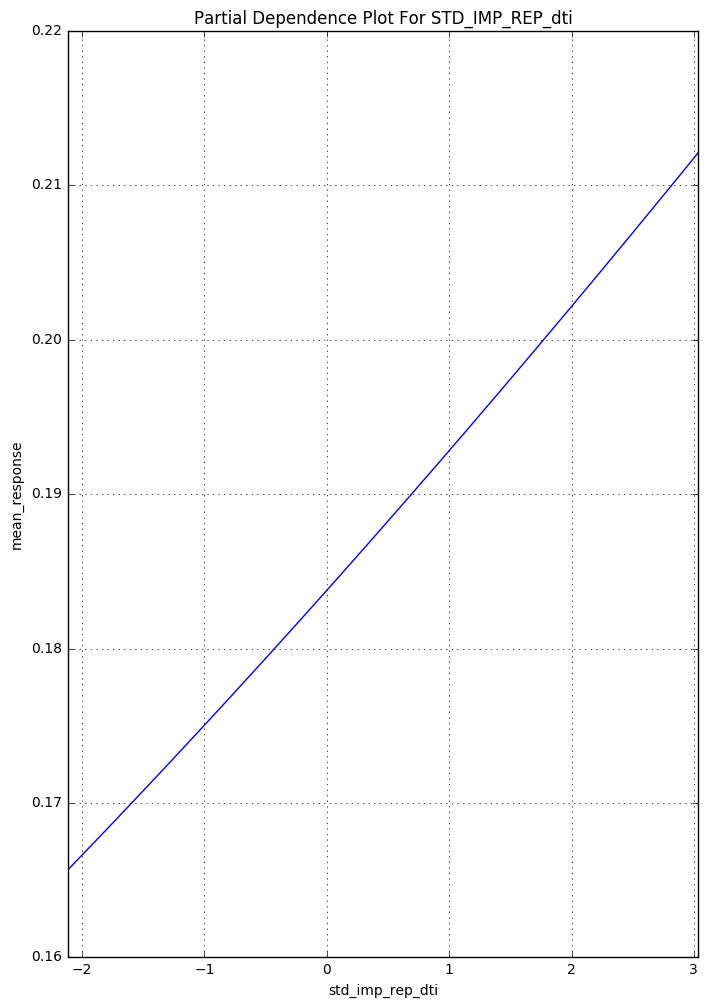

In [16]:
# partial dependence plots are a powerful machine learning interpretation tool
# to calculate partial dependence across the domain a variable
# hold column of interest at constant value
# find the mean prediction of the model with this column constant
# repeat for multiple values of the variable of interest
# h2o has a built-in function for partial dependence as well
par_dep_dti1 = nn_model2.partial_plot(data=train, cols=['STD_IMP_REP_dti'], server=True, plot=True)

In [17]:
# shutdown h2o
h2o.cluster().shutdown(prompt=False)

H2O session _sid_bc2c closed.
